# Heart Disease Prediction

## Qual o objetivo em analisar esse banco de dados?

- Explorar e pré-processar os dados para acharmos o melhor modelo de classificação para esse conjunto de dados.

## Os modelos de machine learning testados nesse conjunto de dados serão:

- Decision Tree (Árvore de decisão)
- Random Forest (Floresta randômica)
- K-Nearest Neighbors (KNN)
- Regressão logística

## Explicação das variáveis do conjunto de dados
1. HeartDisease: Os entrevistados que já relataram ter doença cardíaca coronária (CHD) ou infarto do miocárdio (MI).
2. BMI: Índice de Massa Corporal (IMC).
3. Smoking: Você fumou pelo menos 100 cigarros em toda a sua vida? (A resposta sim ou não).
4. AlcoholDrinking: bebedores pesados (homens adultos que bebem mais de 14 bebidas por semana e mulheres adultas que bebem mais de 7 bebidas por semana)
5. Stroke: você teve um derrame?
6. PhysicalHealth: Agora, pensando em sua saúde física, que inclui doenças e lesões físicas, por quantos dias nos últimos 30 dias sua saúde física não foi boa? (0-30 dias).
7. MentalHealth : Pensando em sua saúde mental, por quantos dias nos últimos 30 dias sua saúde mental não foi boa? (0-30 dias).
8. DiffWalking : Você tem sérias dificuldades para caminhar ou subir escadas?
9. Sex: Você é homem ou mulher?
10. AgeCategory: Categoria de idade dividida em quatorze faixas etárias.
11. Race: Qual a sua raça?
12. Diabetic: Você tinha diabetes?
13. PhysicalActivity: Adultos que relataram fazer atividade física ou exercício durante os últimos 30 dias, além de seu trabalho regular.
14. GenHealth: Você diria que, em geral, sua saúde é...
15. SleepTime: Em média, quantas horas de sono você dorme em um período de 24 horas?
16. Asthma: você teve asma?
17. KidneyDisease: Não incluindo cálculos renais, infecção da bexiga ou incontinência, você já foi informado de que tinha doença renal?
18. SkinCancer: você teve câncer de pele?


## Importação das bibliotecas

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import shapiro
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import warnings

## Lendo o banco de dados

In [3]:
dados = pd.read_csv('C:/Users/jeffe/projeto_heart_disease_prediction/heart_2020_cleaned.csv')

In [4]:
dados

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


- Deixarei apenas 30.000 linhas desse banco de dados, pois já é suficiente para fins de demonstração.

In [5]:
dados = dados.drop(range(30000,319795))

In [6]:
dados

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,No,24.33,No,No,No,0.0,0.0,No,Male,55-59,Other,No,Yes,Excellent,7.0,No,No,No
29996,Yes,27.50,Yes,No,No,0.0,0.0,No,Male,70-74,White,No,Yes,Excellent,8.0,No,No,No
29997,No,25.82,No,No,No,3.0,2.0,No,Female,60-64,White,No,No,Very good,9.0,No,No,No
29998,No,26.78,No,No,No,0.0,4.0,No,Male,25-29,White,No,Yes,Excellent,7.0,No,No,No


## Algumas estatísticas sobre as variáveis numéricas desse conjunto de dados

In [7]:
dados.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,28.059356,3.653867,3.977233,7.138767
std,6.295974,8.208709,7.934995,1.479386
min,12.400000,0.000000,0.000000,1.000000
25%,23.730000,0.000000,0.000000,6.000000
50%,27.120000,0.000000,0.000000,7.000000
75%,31.180000,2.000000,4.000000,8.000000
max,83.000000,30.000000,30.000000,24.000000


## Limpeza dos dados

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      30000 non-null  object 
 1   BMI               30000 non-null  float64
 2   Smoking           30000 non-null  object 
 3   AlcoholDrinking   30000 non-null  object 
 4   Stroke            30000 non-null  object 
 5   PhysicalHealth    30000 non-null  float64
 6   MentalHealth      30000 non-null  float64
 7   DiffWalking       30000 non-null  object 
 8   Sex               30000 non-null  object 
 9   AgeCategory       30000 non-null  object 
 10  Race              30000 non-null  object 
 11  Diabetic          30000 non-null  object 
 12  PhysicalActivity  30000 non-null  object 
 13  GenHealth         30000 non-null  object 
 14  SleepTime         30000 non-null  float64
 15  Asthma            30000 non-null  object 
 16  KidneyDisease     30000 non-null  object

In [9]:
dados.nunique()

HeartDisease           2
BMI                 2078
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             22
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [10]:
dados['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

- Como podemos ver, a variável Diabetic tem 4 valores, então transformaremos os valores "No, borderline diabetes" (que significa pré-diabetes) para No, e, "Yes (during pregnancy)" para Yes. Irei aproveitar e transformarei os valores das variáveis que possuem apenas "Yes" ou "No" para "0" e "1". Já as variáveis que possuem mais de dois possíveis valores, nós trataremos posteriormente.

In [11]:
dados = dados[dados.columns].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'No, borderline diabetes': '0', 'Yes (during pregnancy)': '1'})
dados['Diabetic'] = dados['Diabetic'].astype(int)

In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      30000 non-null  int64  
 1   BMI               30000 non-null  float64
 2   Smoking           30000 non-null  int64  
 3   AlcoholDrinking   30000 non-null  int64  
 4   Stroke            30000 non-null  int64  
 5   PhysicalHealth    30000 non-null  float64
 6   MentalHealth      30000 non-null  float64
 7   DiffWalking       30000 non-null  int64  
 8   Sex               30000 non-null  int64  
 9   AgeCategory       30000 non-null  object 
 10  Race              30000 non-null  object 
 11  Diabetic          30000 non-null  int32  
 12  PhysicalActivity  30000 non-null  int64  
 13  GenHealth         30000 non-null  object 
 14  SleepTime         30000 non-null  float64
 15  Asthma            30000 non-null  int64  
 16  KidneyDisease     30000 non-null  int64 

## Análise exploratória e visualização dos dados

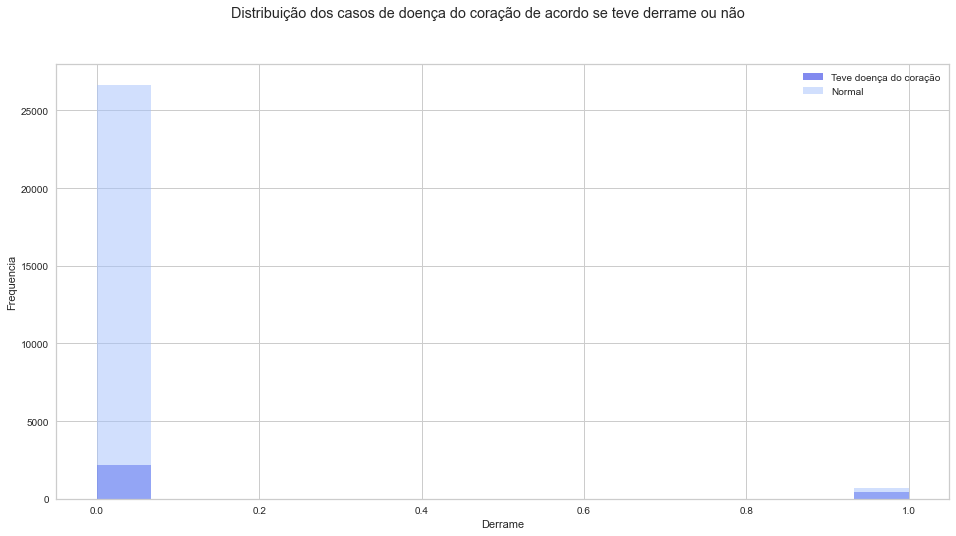

In [13]:
fig, ax = plt.subplots(figsize = (16,8))

ax.hist(dados[dados["HeartDisease"]==1]["Stroke"], bins=15, alpha=0.5, color="#0717E0", label="Teve doença do coração")
ax.hist(dados[dados["HeartDisease"]==0]["Stroke"], bins=15, alpha=0.5, color="#A4C1FC", label="Normal")

ax.set_xlabel("Derrame")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos de doença do coração de acordo se teve derrame ou não")

ax.legend();


- Lembrando que o número 0 significa "Não" e o número 1 significa "Sim"
- Aqui podemos observar que poucas pessoas que foram entrevistadas tiveram derrame, mas nota-se que a maioria das pessoas que passaram por isso sofreram também de doença cardíaca.

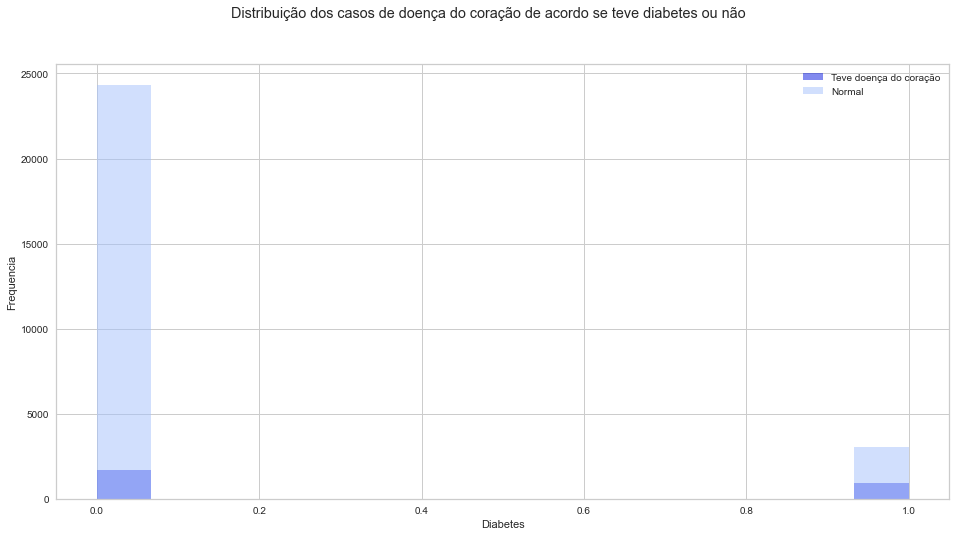

In [14]:
fig, ax = plt.subplots(figsize = (16,8))

ax.hist(dados[dados["HeartDisease"]==1]["Diabetic"], bins=15, alpha=0.5, color="#0717E0", label="Teve doença do coração")
ax.hist(dados[dados["HeartDisease"]==0]["Diabetic"], bins=15, alpha=0.5, color="#A4C1FC", label="Normal")

ax.set_xlabel("Diabetes")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos de doença do coração de acordo se teve diabetes ou não")

ax.legend();

Aqui podemos observar que a maioria dos entrevistados não possuíam diabetes.

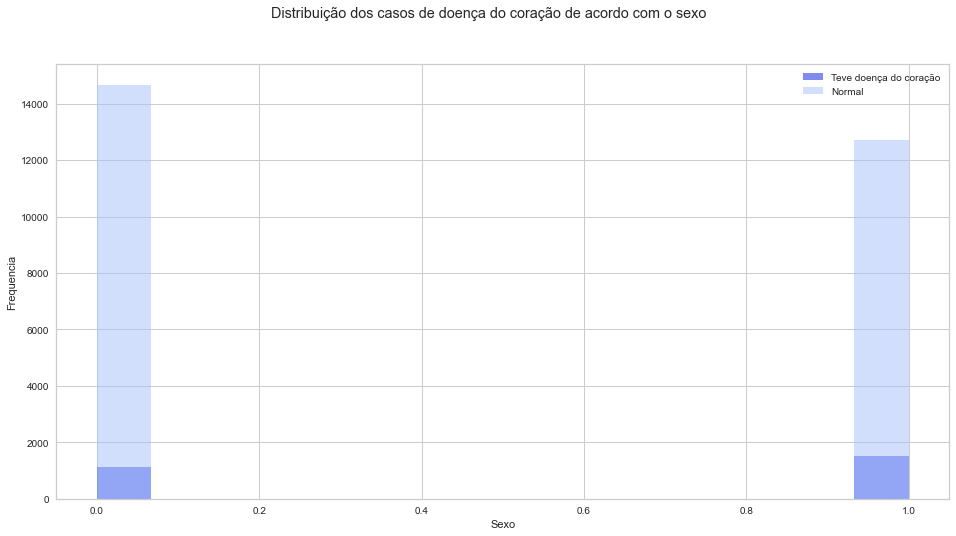

In [15]:
fig, ax = plt.subplots(figsize = (16,8))

ax.hist(dados[dados["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="#0717E0", label="Teve doença do coração")
ax.hist(dados[dados["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="#A4C1FC", label="Normal")

ax.set_xlabel("Sexo")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos de doença do coração de acordo com o sexo")

ax.legend();

- Devemos nos lembrar que classificamos o numero 0 para o gênero feminino e 1 para masculino.
- podemos notar que:
    - há relativamente um número maior de pacientes do gênero feminino;
    - mesmo com um menor número de pacientes do gênero masculino, nota-se que possue uma frequência maior de doença cardíaca se comparado com as gênero feminino;

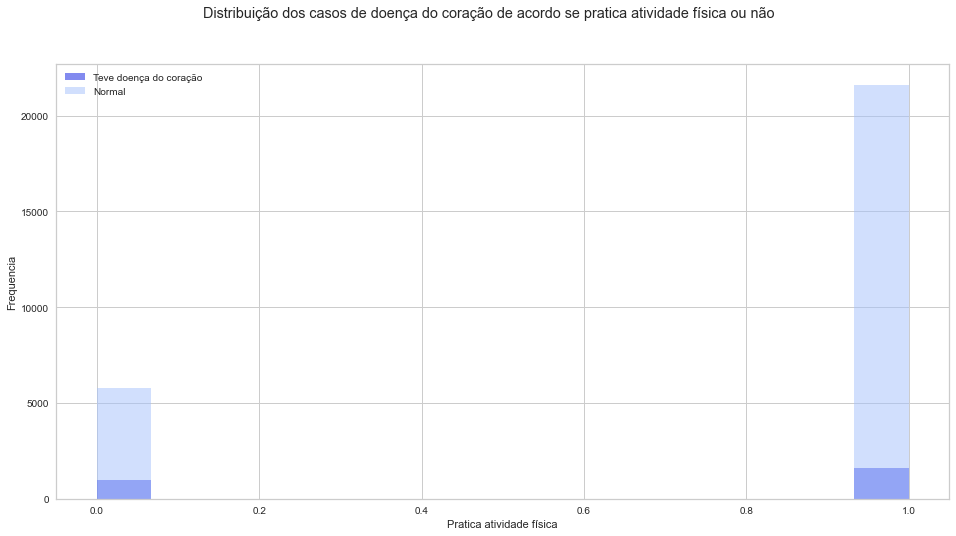

In [16]:
fig, ax = plt.subplots(figsize = (16,8))

ax.hist(dados[dados["HeartDisease"]==1]["PhysicalActivity"], bins=15, alpha=0.5, color="#0717E0", label="Teve doença do coração")
ax.hist(dados[dados["HeartDisease"]==0]["PhysicalActivity"], bins=15, alpha=0.5, color="#A4C1FC", label="Normal")

ax.set_xlabel("Pratica atividade física")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos de doença do coração de acordo se pratica atividade física ou não")

ax.legend();

- Aqui podemos ver que a maioria dos entrevistados praticaram atividade física nos últimos 30 dias. Olhando agora para as frequências podemos imaginar que quem pratica atividade física tem menos chances de possuir doença cardíaca.

## Análise de correlação

<AxesSubplot:>

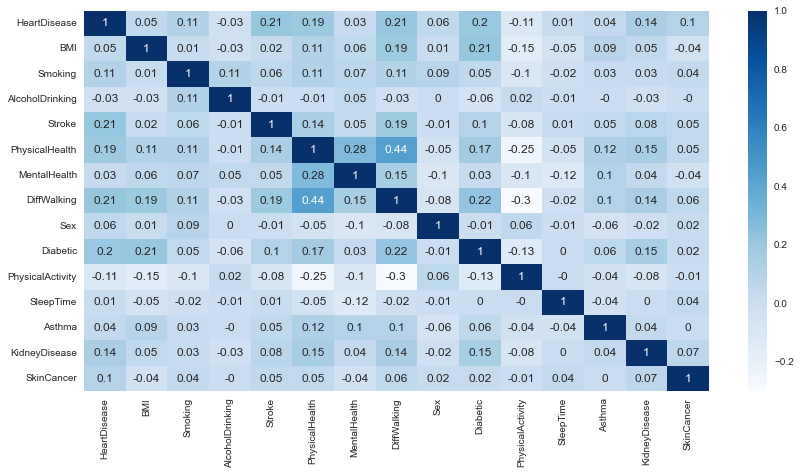

In [17]:
correlation = dados.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Blues')

- Como podemos observar, nenhuma variável tem grande influência sobre outra. As variáveis que possuem a correlação mais alta são DiffWalking (dificuldade de andar) com PhysicalHealth (saúde fisica) e mesmo assim não é uma grande correlação.
- Seguiremos com todas as variáveis para o modelos

## Pré-processamento dos dados

### Escalonamento

- Para variáveis quantitativas com mais de duas categorias

In [18]:
from sklearn.preprocessing import StandardScaler 
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
Scaler = StandardScaler()
dados[num_cols] = Scaler.fit_transform(dados[num_cols])

### OneHotEncoder

- Para variáveis qualitativas com mais de duas categorias

In [19]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder() 

categ = dados[['AgeCategory', 'Race', 'GenHealth']]
encoded_categ = pd.DataFrame(enc.fit_transform(categ).toarray())

dados = pd.concat([dados, encoded_categ], axis = 1)

dados = dados.drop(columns = ['AgeCategory', 'Race', 'GenHealth'], axis = 1)

In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      30000 non-null  int64  
 1   BMI               30000 non-null  float64
 2   Smoking           30000 non-null  int64  
 3   AlcoholDrinking   30000 non-null  int64  
 4   Stroke            30000 non-null  int64  
 5   PhysicalHealth    30000 non-null  float64
 6   MentalHealth      30000 non-null  float64
 7   DiffWalking       30000 non-null  int64  
 8   Sex               30000 non-null  int64  
 9   Diabetic          30000 non-null  int32  
 10  PhysicalActivity  30000 non-null  int64  
 11  SleepTime         30000 non-null  float64
 12  Asthma            30000 non-null  int64  
 13  KidneyDisease     30000 non-null  int64  
 14  SkinCancer        30000 non-null  int64  
 15  0                 30000 non-null  float64
 16  1                 30000 non-null  float6

Podemos ver acima que foram adicionadas novas colunas. Essas colunas (0, 1, ..., 23) são provenientes do OneHotEncoder. 

## Dividindo o conjunto de dados em variáveis explicativas e variável respota. Nesse caso a nossa variável de interesse (variável resposta) é a HearthDisease

In [21]:
explicativas = dados.drop(columns =['HeartDisease'], axis = 1)
resposta = dados['HeartDisease']

explicativas = round(explicativas, 10).values
resposta = round(resposta, 10).values

Aqui eu arredondei em dez casas decimais todos os números pois haviam valores com uma quantidade de casas decimais muito grande, que fazia com que algumas etapas não pudessem ser feitas, como por exemplo no GridSearchCV.

## Selecionando os melhores parâmetros com GridSearchCV

### Decision Tree

In [22]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20]}

In [23]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(explicativas, resposta)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 20, 'min_samples_split': 5, 'splitter': 'random'}
0.9112333333333333


### Random Forest

In [10]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 20, 40, 80, 150],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20]}

In [11]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(explicativas, resposta)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 150}
0.9146333333333334


### K-Nearest Neighbors (KNN)

In [26]:
parametros = {'weights': ['uniform', 'distance'],
              'n_neighbors': [2, 4, 8],
              'p': [1, 2, 5]}

In [25]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(explicativas, resposta)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}
0.9111333333333332



### Regressão Logística

In [27]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [31]:
warnings.filterwarnings('ignore')

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(explicativas, resposta)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9140666666666666


## Cross-Validation

In [32]:
warnings.filterwarnings('ignore')

resultados_arvore = []
resultados_floresta = []
resultados_knn = []
resultados_logistica = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  #decision tree
  arvore = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 20, min_samples_split = 5, splitter = 'random')
  scores = cross_val_score(arvore, explicativas, resposta, cv = kfold)
  resultados_arvore.append(scores.mean())

  #random forest
  forest = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split = 20, n_estimators = 150)
  scores = cross_val_score(forest, explicativas, resposta, cv = kfold)
  resultados_floresta.append(scores.mean())

  #knn
  knn = KNeighborsClassifier(n_neighbors = 8, p = 2, weights = 'uniform')
  scores = cross_val_score(knn, explicativas, resposta, cv = kfold)
  resultados_knn.append(scores.mean())
    
  #regressão logistica
  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, explicativas, resposta, cv = kfold)
  resultados_logistica.append(scores.mean())





0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [33]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_floresta,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica})
resultados

,Arvore,Random forest,KNN,Logistica
0,0.912867,0.914900,0.912300,0.914900
1,0.911800,0.915033,0.912133,0.914500
2,0.911567,0.915000,0.911800,0.914267
3,0.911800,0.914300,0.911467,0.914700
4,0.913133,0.914533,0.911900,0.914733
5,0.912567,0.914700,0.911533,0.914600
6,0.911333,0.914933,0.911733,0.914500
7,0.911500,0.914600,0.912033,0.914467
8,0.911567,0.914533,0.911767,0.914533
9,0.911900,0.915133,0.912400,0.914400


In [34]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica
count,30.000000,30.000000,30.000000,30.000000
mean,0.911934,0.914733,0.911863,0.914558
std,0.000572,0.000215,0.000297,0.000164
min,0.911000,0.914300,0.911367,0.914267
25%,0.911517,0.914575,0.911633,0.914475
50%,0.911800,0.914700,0.911800,0.914517
75%,0.912217,0.914925,0.912083,0.914683
max,0.913133,0.915133,0.912467,0.914900


## Teste de normalidade dos resultados

In [35]:
shapiro(resultados_arvore), shapiro(resultados_floresta), shapiro(resultados_knn), shapiro(resultados_logistica)

(ShapiroResult(statistic=0.9356299638748169, pvalue=0.06940416246652603),
 ShapiroResult(statistic=0.9740755558013916, pvalue=0.6555191278457642),
 ShapiroResult(statistic=0.9646760821342468, pvalue=0.4053846597671509),
 ShapiroResult(statistic=0.9609346389770508, pvalue=0.32722005248069763))

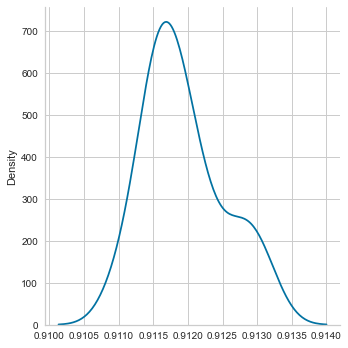

In [36]:
sns.displot(resultados_arvore, kind = 'kde');

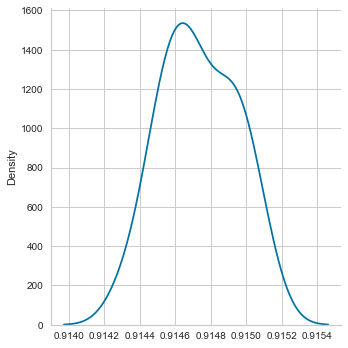

In [37]:
sns.displot(resultados_floresta, kind = 'kde');

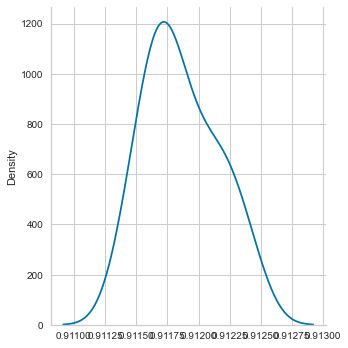

In [38]:
sns.displot(resultados_knn, kind = 'kde');

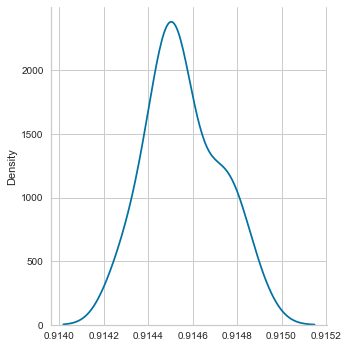

In [39]:
sns.displot(resultados_logistica, kind = 'kde');

No teste de Shapiro-Wilk temos que a hipótese nula é que os dados seguem normalidade, dito isso, podemos afirmar que nós não rejeitamos a hipótese nula com 95% de confiança, pois todos os valores de 'p' obtidos através do teste foram maiores que 0,05.

## Teste de hipótese com ANOVA e teste Tukey

In [40]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_floresta, resultados_knn, resultados_logistica]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica']}

In [41]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.912867,arvore
1,0.911800,arvore
2,0.911567,arvore
3,0.911800,arvore
4,0.913133,arvore
...,...,...
115,0.914500,logistica
116,0.914433,logistica
117,0.914533,logistica
118,0.914833,logistica


In [42]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [43]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2    meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
   arvore           knn  -0.0001 0.8432 -0.0003 0.0002  False
   arvore     logistica   0.0026  0.001  0.0024 0.0029   True
   arvore random_forest   0.0028  0.001  0.0026  0.003   True
      knn     logistica   0.0027  0.001  0.0025 0.0029   True
      knn random_forest   0.0029  0.001  0.0026 0.0031   True
logistica random_forest   0.0002 0.2151 -0.0001 0.0004  False
-------------------------------------------------------------


De acordo com o teste de Tukey podemos afirmar que não rejeitamos a hipótese nula para a comparação das médias entre árvore de decisão e knn, podemos afirmar o mesmo para as médias da Regressão Logística e do Random Forest, isso significa que as médias desses algoritmos não diferem estatísticamente com 95% de confiança.

In [44]:
resultados.mean()

Arvore           0.911934
Random forest    0.914733
KNN              0.911863
Logistica        0.914558
dtype: float64

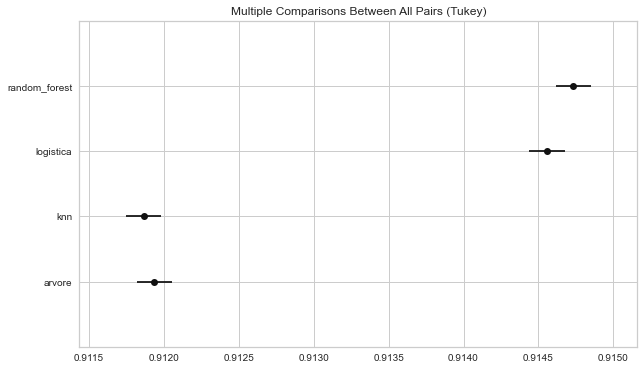

In [45]:
teste_estatistico.plot_simultaneous();

## Aplicando o algoritmo de Regressão Logística

In [61]:
x_train, x_test, y_train, y_test = train_test_split(explicativas,resposta,test_size=0.3,random_state=1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((21000, 38), (21000,), (9000, 38), (9000,))

In [ ]:
warnings.filterwarnings('ignore')

logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001, random_state=1)
logistica.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [84]:
previsoes_log = logistica.predict(x_test)
previsoes_log

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
accuracy_score(y_test, previsoes_log)

0.9138888888888889

0.9138888888888889

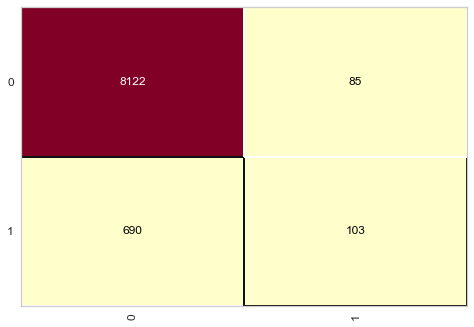

In [87]:
cm = ConfusionMatrix(logistica)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [88]:
print(classification_report(y_test, previsoes_log))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      8207
           1       0.55      0.13      0.21       793

    accuracy                           0.91      9000
   macro avg       0.73      0.56      0.58      9000
weighted avg       0.89      0.91      0.89      9000



Aqui podemos observar que o algoritmo de Regressão Logística consegue prever 99% de todas as pessoas que não vão possuir doença do coração e desses, 92% realmente não irão ter tal doença. Já para os que irão possuir doença de coração, esse algoritmo consegue prever apenas 13% e desses, ele consegue acertar em 55% dos casos.

## Aplicando o algoritmo K-Nearest Neighbors (KNN)

In [89]:
knn = KNeighborsClassifier(n_neighbors = 8, p = 2, weights = 'uniform')
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [90]:
previsoes_knn = knn.predict(x_test)
previsoes_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
accuracy_score(y_test, previsoes_knn)

0.9103333333333333

0.9103333333333333

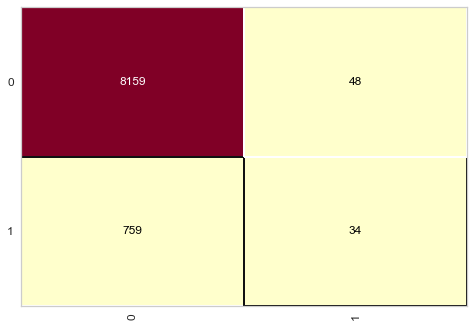

In [93]:
cm = ConfusionMatrix(knn)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [94]:
print(classification_report(y_test, previsoes_knn))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8207
           1       0.41      0.04      0.08       793

    accuracy                           0.91      9000
   macro avg       0.66      0.52      0.52      9000
weighted avg       0.87      0.91      0.88      9000



Aqui podemos observar que o algoritmo KNN consegue prever 99% de todas as pessoas que não vão possuir doença do coração e desses, 91% realmente não irão ter tal doença. Já para os que irão possuir doença de coração, esse algoritmo consegue prever apenas 4% e desses, ele consegue acertar em 41% dos casos.

## Aplicação do algoritmo Decision Tree

In [95]:
dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 20, min_samples_split = 5, splitter = 'random', random_state = 1)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       min_samples_split=5, random_state=1, splitter='random')

In [96]:
previsoes_dt = dt.predict(x_test)
previsoes_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
accuracy_score(y_test, previsoes_dt)

0.9117777777777778

0.9117777777777778

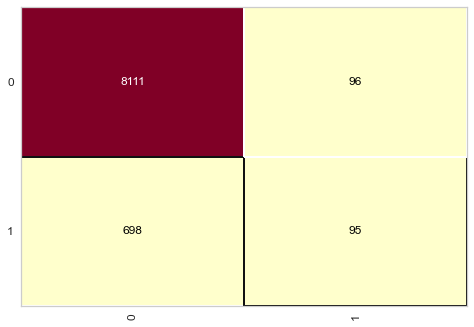

In [99]:
cm = ConfusionMatrix(dt)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [100]:
print(classification_report(y_test, previsoes_dt))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      8207
           1       0.50      0.12      0.19       793

    accuracy                           0.91      9000
   macro avg       0.71      0.55      0.57      9000
weighted avg       0.88      0.91      0.89      9000



Aqui podemos observar que o algoritmo Decision Tree consegue prever 99% de todas as pessoas que não vão possuir doença do coração e desses, 92% realmente não irão ter tal doença. Já para os que irão possuir doença de coração, esse algoritmo consegue prever apenas 12% e desses, ele consegue acertar em 50% dos casos.

## Aplicando o algoritmo Random Forest

In [101]:
rf = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split = 20, n_estimators = 150, random_state = 1)
rf.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=20, n_estimators=150, random_state=1)

In [102]:
previsoes_rf = rf.predict(x_test)
previsoes_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
accuracy_score(y_test, previsoes_rf)

0.9145555555555556

0.9145555555555556

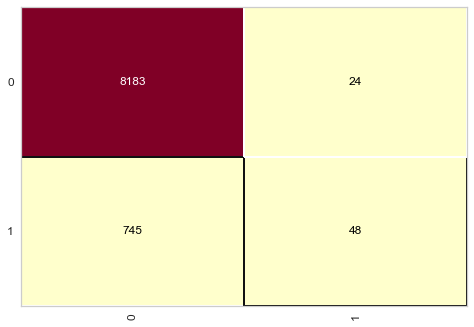

In [105]:
cm = ConfusionMatrix(rf)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [106]:
print(classification_report(y_test, previsoes_rf))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8207
           1       0.67      0.06      0.11       793

    accuracy                           0.91      9000
   macro avg       0.79      0.53      0.53      9000
weighted avg       0.89      0.91      0.88      9000



Aqui podemos observar que o algoritmo Random Forest consegue prever 100% de todas as pessoas que não vão possuir doença do coração e desses, 92% realmente não irão ter tal doença. Já para os que irão possuir doença de coração, esse algoritmo consegue prever apenas 6% e desses, ele consegue acertar em 67% dos casos.

# Conclusão

- De acordo com toda a análise podemos obervar que o algoritmo que mais se adaptou com os dados e com os parâmetros escolhidos pelo GridSearch foi a Regressão Logística com 91,38% de precisão. O algoritmo Random Forest apesar de ter tido uma precisão maior, ele foi menos eficiente em prever os pacientes que teriam doença cardíaca.
- Todos os algoritmos foram muito bons em prever os pacientes que não teriam doença cardíaca, mas em prever quem teria a doença nenhum dos algoritmos foi bom. O que se saiu melhor foi justamente o algoritmo de regressão logística, prevendo 13% e acertando 55% desses.